In [54]:
import tensorflow as tf 
import streamlit as st
from fastapi import FastAPI

In [55]:
import pandas as pd 
import numpy as np 


In [56]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [14]:
data = pd.read_csv('G:\\FAST\\prjects\\combine\\train.csv')

In [15]:
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [16]:
data.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

Data Preparation

In [17]:
data.shape

(1000, 12)

In [19]:
# convert data into tensors 
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [20]:
# shuffling the data 
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[2.370000e+02 6.008730e+05 7.186750e+05 5.000000e+00 9.120400e+04
  5.000000e+00 5.000000e+00 1.500000e+01 1.830000e+02 7.600000e+01
  1.330000e+02 2.968290e+05]
 [3.920000e+02 5.839790e+05 7.118200e+05 2.000000e+00 7.171600e+04
  2.000000e+00 6.000000e+00 1.100000e+01 1.630000e+02 6.800000e+01
  7.400000e+01 3.651365e+05]
 [3.500000e+01 6.304890e+05 7.171820e+05 5.000000e+00 9.622600e+04
  1.000000e+00 9.000000e+00 8.000000e+00 1.910000e+02 1.010000e+02
  9.400000e+01 3.171190e+05]
 [1.920000e+02 6.173060e+05 7.142140e+05 6.000000e+00 7.979700e+04
  1.000000e+00 1.000000e+01 1.000000e+01 1.920000e+02 6.300000e+01
  1.170000e+02 3.929205e+05]
 [3.210000e+02 6.922520e+05 8.039410e+05 3.000000e+00 5.268600e+04
  1.000000e+00 8.000000e+00 1.200000e+01 1.910000e+02 7.100000e+01
  7.300000e+01 5.538550e+05]], shape=(5, 12), dtype=float32)


In [21]:
# we don't need all column 
X = tensor_data[:,3:-1]
print(X[:5])

tf.Tensor(
[[5.0000e+00 9.1204e+04 5.0000e+00 5.0000e+00 1.5000e+01 1.8300e+02
  7.6000e+01 1.3300e+02]
 [2.0000e+00 7.1716e+04 2.0000e+00 6.0000e+00 1.1000e+01 1.6300e+02
  6.8000e+01 7.4000e+01]
 [5.0000e+00 9.6226e+04 1.0000e+00 9.0000e+00 8.0000e+00 1.9100e+02
  1.0100e+02 9.4000e+01]
 [6.0000e+00 7.9797e+04 1.0000e+00 1.0000e+01 1.0000e+01 1.9200e+02
  6.3000e+01 1.1700e+02]
 [3.0000e+00 5.2686e+04 1.0000e+00 8.0000e+00 1.2000e+01 1.9100e+02
  7.1000e+01 7.3000e+01]], shape=(5, 8), dtype=float32)


In [22]:
# target variable 
y = tensor_data[:,-1]
print(y[:5].shape)
y = tf.expand_dims(y, axis = -1)
print(y[:5])

(5,)
tf.Tensor(
[[296829. ]
 [365136.5]
 [317119. ]
 [392920.5]
 [553855. ]], shape=(5, 1), dtype=float32)


In [23]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [24]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [27]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [28]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [29]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

In [45]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [30]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.2683118 , -0.32096574,  1.4289248 , -0.20936328,  1.5133545 ,
         0.8392438 , -0.41619942,  1.3802676 ],
       [-1.4863148 , -0.99067396, -0.6998269 ,  0.14399263, -0.26706275,
        -0.19081832, -0.8097687 , -1.38954   ],
       [ 0.2683118 , -0.14838392, -1.4094108 ,  1.2040604 , -1.6023757 ,
         1.2512687 ,  0.81370443, -0.4506221 ],
       [ 0.8531873 , -0.7129691 , -1.4094108 ,  1.5574163 , -0.7121671 ,
         1.3027718 , -1.0557494 ,  0.6291334 ],
       [-0.90143925, -1.644643  , -1.4094108 ,  0.8507045 ,  0.17804156,
         1.2512687 , -0.6621802 , -1.4364858 ]], dtype=float32)>

In [31]:
print(X[:5])

tf.Tensor(
[[5.0000e+00 9.1204e+04 5.0000e+00 5.0000e+00 1.5000e+01 1.8300e+02
  7.6000e+01 1.3300e+02]
 [2.0000e+00 7.1716e+04 2.0000e+00 6.0000e+00 1.1000e+01 1.6300e+02
  6.8000e+01 7.4000e+01]
 [5.0000e+00 9.6226e+04 1.0000e+00 9.0000e+00 8.0000e+00 1.9100e+02
  1.0100e+02 9.4000e+01]
 [6.0000e+00 7.9797e+04 1.0000e+00 1.0000e+01 1.0000e+01 1.9200e+02
  6.3000e+01 1.1700e+02]
 [3.0000e+00 5.2686e+04 1.0000e+00 8.0000e+00 1.2000e+01 1.9100e+02
  7.1000e+01 7.3000e+01]], shape=(5, 8), dtype=float32)


In [32]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
________________

In [37]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [38]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [40]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)

Epoch 1/100

25/25 [==============================] - 3s 25ms/step - loss: 152379.4688 - root_mean_squared_error: 201037.4688 - val_loss: 74173.8125 - val_root_mean_squared_error: 88530.1094
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 51704.3242 - root_mean_squared_error: 64182.8672 - val_loss: 45328.6602 - val_root_mean_squared_error: 55294.2812
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 48336.7617 - root_mean_squared_error: 60542.3555 - val_loss: 43177.2812 - val_root_mean_squared_error: 53265.7734
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 45329.9883 - root_mean_squared_error: 56584.5000 - val_loss: 44455.9492 - val_root_mean_squared_error: 55120.5625
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 44373.8438 - root_mean_squared_error: 55157.2188 - val_loss: 41397.8125 - val_root_mean_squared_error: 50941.9414
Epoch 6/100
25/25 [==============================] - 0s 7ms/s

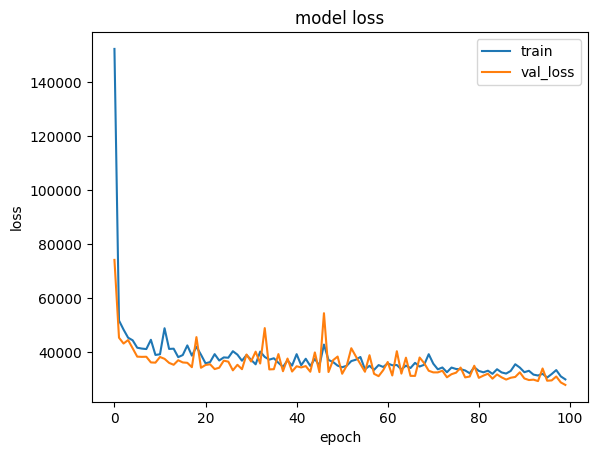

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

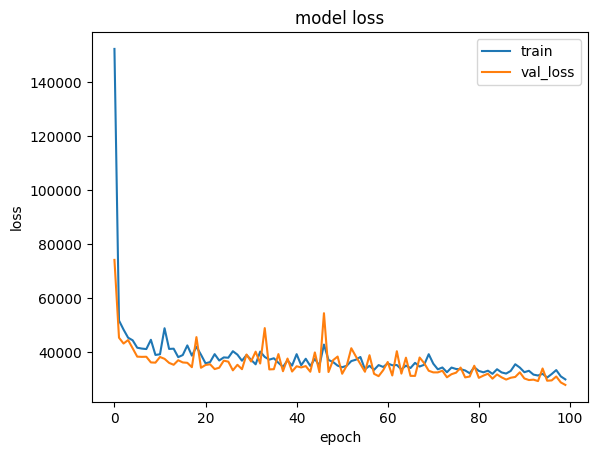

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

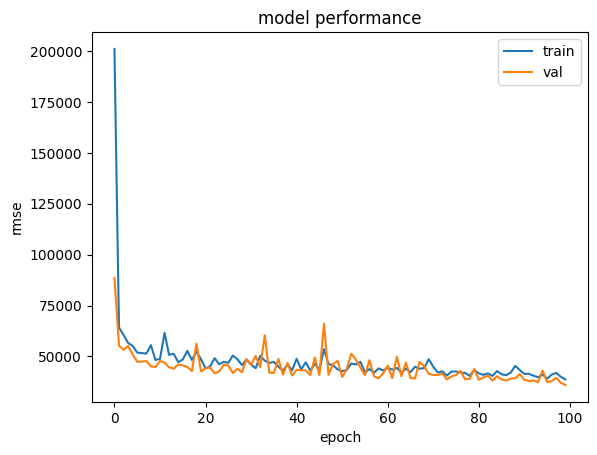

In [43]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [46]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 1s 6ms/step - loss: 37602.2031 - root_mean_squared_error: 46479.1953


[37602.203125, 46479.1953125]

In [47]:
X_test.shape

TensorShape([100, 8])

In [48]:
model.predict(tf.expand_dims(X_test[0], axis = 0 ))

1/1 [==============================] - 1s 846ms/step


array([[225218.44]], dtype=float32)

In [49]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([163225.], dtype=float32)>

In [50]:
y_true = list(y_test[:,0].numpy())

In [52]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 3ms/step
[225218.44, 389065.53, 385796.56, 193708.95, 270344.6, 399078.75, 435643.3, 420010.34, 323878.53, 319853.03, 233776.22, 227884.8, 148465.27, 401753.62, 430064.78, 197000.9, 183348.61, 362391.1, 141261.56, 477681.7, 396876.6, 405694.34, 177270.52, 220486.4, 342193.84, 334052.06, 386873.22, 332226.4, 246630.78, 537769.56, 452897.1, 418445.84, 427921.78, 134529.81, 183698.44, 484904.72, 476287.44, 206833.58, 249792.4, 418000.7, 253063.45, 368871.34, 215710.62, 444226.53, 246733.56, 470013.56, 269650.7, 509729.6, 101322.69, 307087.84, 171983.55, 166933.5, 98363.695, 319835.4, 474993.9, 429724.1, 298797.66, 160467.61, 182675.44, 197191.62, 481952.9, 156178.16, 307396.8, 188800.84, 157650.52, 159610.73, 324859.9, 148801.72, 275506.1, 456349.47, 310849.34, 141873.6, 276046.8, 347671.72, 156866.95, 177075.58, 442564.03, 287962.1, 427820.84, 361046.4, 452847.38, 113356.71, 295026.6, 219236.22, 126510.734, 231409.94, 230183.67, 190476.81, 216103

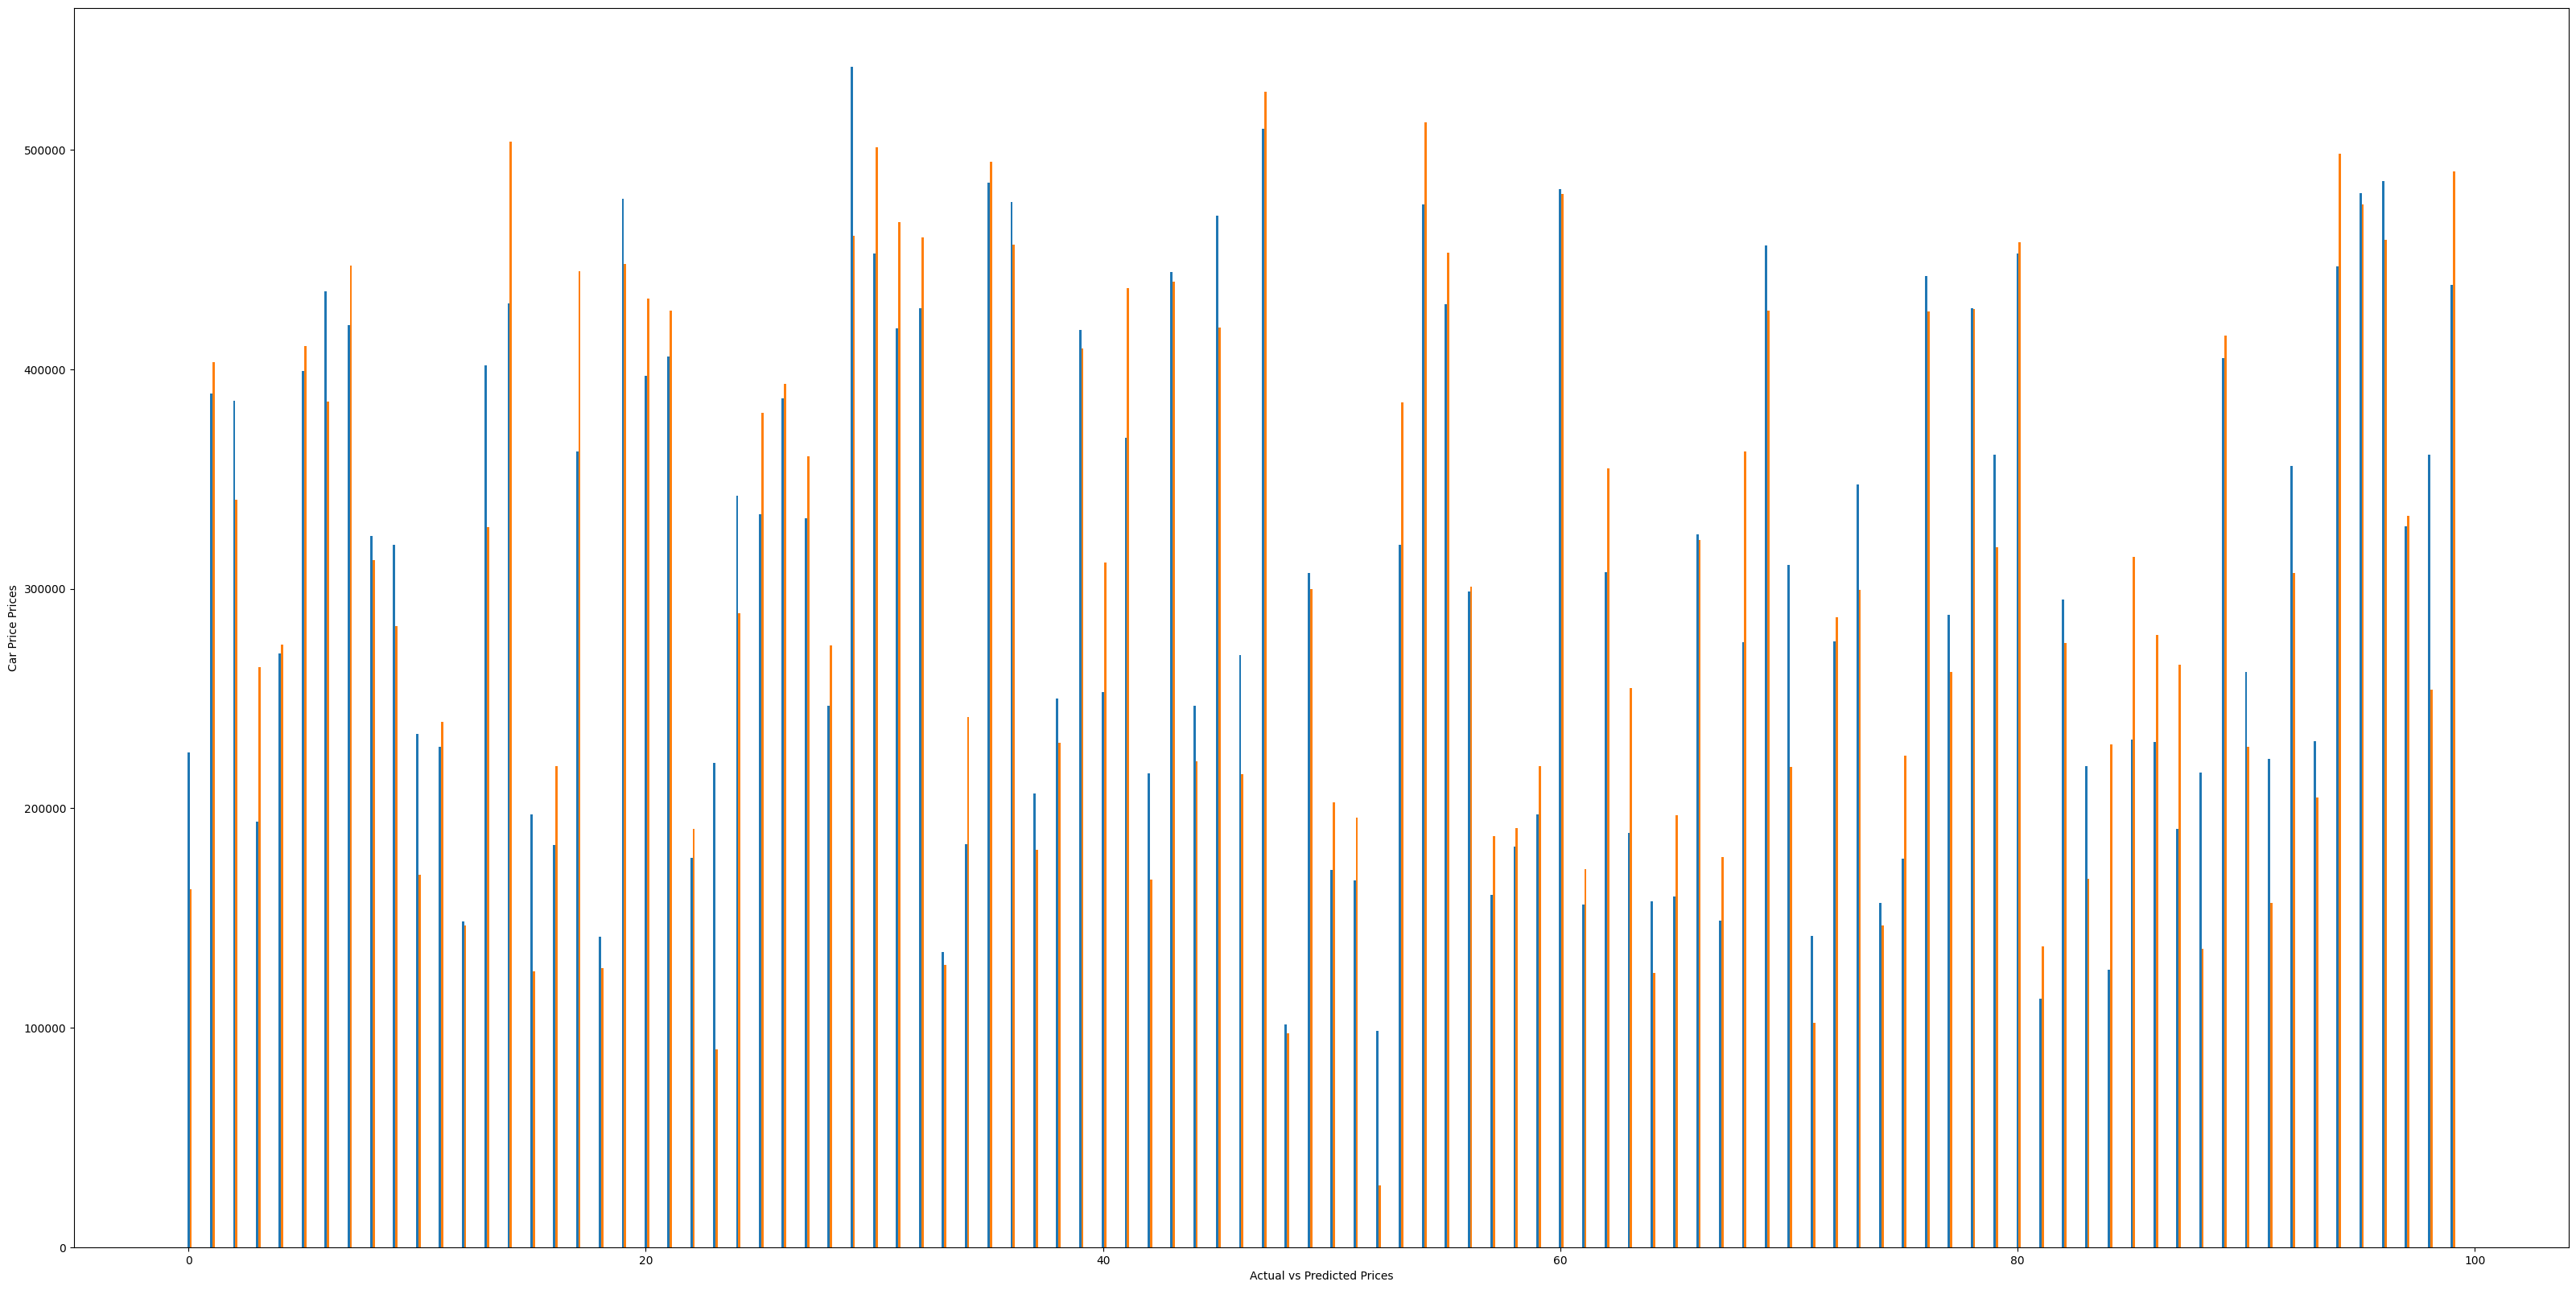

In [53]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()